In [1]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

sys.path.append(work_path+'ebfpy-master/')

# fdnu

In [2]:
yu = np.load(work_path+"sample/yu_nc/yu18.npy", allow_pickle=True).tolist()
padova = np.load(work_path+"sample/padova_nc/padova.npy", allow_pickle=True).tolist()

In [3]:
# from fdnu import asfgrid
# s=asfgrid.Seism(datadir=work_path+"fdnu/")

# evstate = np.zeros(len(yu['feh']))+2
# mass, _ = s.get_mass_radius(evstate, yu['feh'], yu['teff'], yu['dnu'], 
#                            yu['numax'], fill_value=None, isfeh=True)
# fdnu_yu = (mass/yu['mass_nc'])**0.25


# evstate = np.zeros(len(padova['feh']))+2
# _, _ ,fdnu_pdv=s.get_dnu_numax(evstate,padova['feh'],padova['teff'],
#                                padova['mini'],padova['mass'],padova['logg'],fill_value=None, isfeh=True)

# mass, _ = s.get_mass_radius(evstate, padova['feh'], padova['teff'], padova['dnu_nc'], 
#                            padova['numax'], fill_value=None, isfeh=True)

# fdnu_pdv1 = (padova['dnu']/padova['dnu_nc'])#**0.25

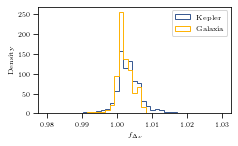

In [4]:
fdnu_yu = (yu['mass']/yu['mass_nc'])**0.25
fdnu_pdv = padova['dnu']/padova['dnu_nc']

fig = plt.figure(figsize=mnras_size())
axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)
ind = np.arange(4)
bins = np.linspace(0.98, 1.03, 40)
histstyle = {'density':True, 'bins':bins, 'histtype':'step'}
axes[0].hist(fdnu_yu, color=blue, label='Kepler', **histstyle)
axes[0].hist(fdnu_pdv, color=orange, label='Galaxia', **histstyle)

axes[0].set_xlabel("$f_{\Delta\\nu}$")
axes[0].set_ylabel("Density")
axes[0].legend()
plt.tight_layout()
plt.savefig(overleaf_path+'fdnu.pdf')

[0, 4, 0.9, 1.1]

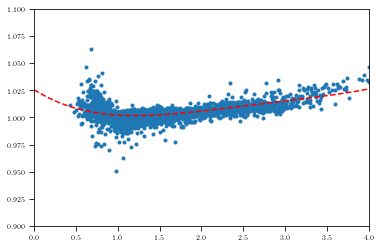

In [56]:
fdnu_yu = (yu['mass']/yu['mass_nc'])**0.25
fdnu_pdv = padova['dnu']/padova['dnu_nc']

x = np.linspace(0,10,1000)
# y = -0.002*(x-1.)*(x-3.)*(x-5) + 1

p = np.polyfit(yu['mass'], fdnu_yu, 4)
y = np.polyval(p,x)

plt.plot(yu['mass'], fdnu_yu,  '.')
plt.plot(x, y, 'r--')
plt.axis([0,4,0.9, 1.1])

In [22]:
padova

{'dnu': array([0.95157744, 0.27807463, 0.29852363, ..., 4.0600764 , 3.72004968,
        4.09232265]),
 'numax': array([ 6.29247301,  1.17174832,  1.22738607, ..., 30.21061655,
        29.75337733, 30.79494786]),
 'nike': array([4.1751481 , 4.05008738, 3.90622435, ..., 3.17384333, 3.42454962,
        3.19440324]),
 'feh': array([-0.11986261,  0.00859269,  0.04594804, ..., -0.3937061 ,
        -0.01835129, -0.18085223], dtype=float32),
 'mass': array([2.177, 1.732, 1.386, ..., 0.946, 1.103, 0.915], dtype=float32),
 'radius': array([35.259132, 74.828926, 65.942604, ..., 10.279586, 11.300368,
        10.027452], dtype=float32),
 'dnu_nc': array([0.9520881, 0.2746787, 0.2970215, ..., 3.98692  , 3.7351172,
        4.0698647], dtype=float32),
 'nike_nc': array([4.17290863, 4.10015959, 3.9259792 , ..., 3.23208041, 3.41073493,
        3.21203026])}

In [16]:
yu

{'dnu': array([3.962, 4.414, 3.991, ..., 4.335, 4.054, 3.891]),
 'numax': array([29.48, 41.17, 36.91, ..., 37.81, 28.74, 30.03]),
 'feh': array([-0.21, -0.12, -0.02, ..., -0.09, -0.53,  0.01]),
 'mass': array([1.00061327, 1.74695742, 1.66887128, ..., 1.37304244, 0.83662308,
        1.02583185]),
 'radius': array([10.52020565, 11.82934633, 12.43382486, ..., 11.03472687,
         9.79545425, 10.74208522]),
 'mass_nc': array([0.99911829, 1.70755444, 1.65171281, ..., 1.35253137, 0.81757662,
        1.02111216]),
 'radius_nc': array([10.51234379, 11.69517882, 12.36974061, ..., 10.9519961 ,
         9.68331125, 10.71734543]),
 'nike': array([3.19323689, 3.68216564, 3.75211643, ..., 3.5173526 , 3.06183179,
        3.29689616]),
 'teff': array([5188, 5072, 4718, ..., 4906, 5077, 4834]),
 'e_dnu': array([0.116, 0.061, 0.064, ..., 0.103, 0.057, 0.049]),
 'e_numax': array([0.48, 0.9 , 0.71, ..., 0.42, 0.78, 0.66]),
 'e_feh': array([0.3 , 0.3 , 0.3 , ..., 0.15, 0.3 , 0.3 ]),
 'e_mass': array([0.13

[0, 3, 2.5, 20]

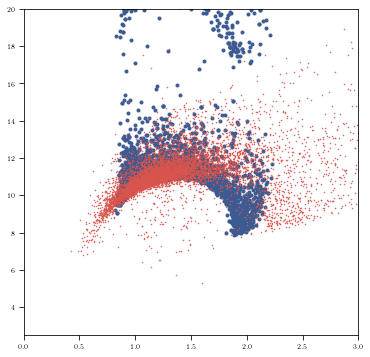

In [60]:
from lib.histdist import reduce_samples
idx = reduce_samples(len(padova['mass']), len(yu['mass']))
xobs, yobs = yu['mass'], yu['radius']
xpdv, ypdv = padova['mass'][idx], padova['radius'][idx]

mass = yu['mass']
fnumax = fdnu_yu
xobs = xobs #* fnumax**-3

sstyle = {'marker':'.'}

fig = plt.figure(figsize=(6,6))
axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)
axes[0].scatter(xpdv, ypdv, color=blue, label='Galaxia',  **sstyle)
axes[0].scatter(xobs, yobs, color=red, label='Kepler', s=1,**sstyle)
axes[0].axis([0,3,2.5,20])

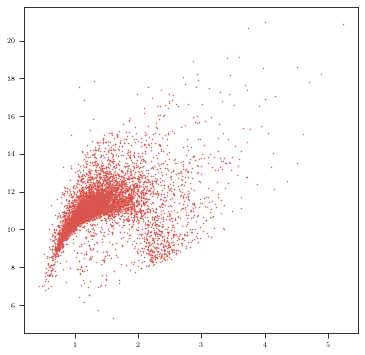

In [11]:
xobs, yobs = yu['mass'], yu['radius']

sstyle = {'marker':'.'}

fig = plt.figure(figsize=(6,6))
axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)
# axes[0].scatter(xpdv, ypdv, color=blue, label='Galaxia',  **sstyle)
axes[0].scatter(xobs, yobs, color=red, label='Kepler', s=1,**sstyle)
# axes[0].axis([0,3,4000, 6000])